<a href="https://colab.research.google.com/github/bhanuprakash003/hotel-booking-EDA-project/blob/main/Yes_BankStock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression-yes bank stock closining price prediction ipynb
##### **Contribution**    - Team
##### **Team Member 1 - Bhanu Prakash
##### **Team Member 2- Swapnil Liladhar Sawai

# **Project Summary -**

Yes Bank is a banking company that was founded in 2004 that offers a wide range of differentiated products for its corporate and retail customers through retail banking and asset management services. It is also a publically traded company. That provides an opportunity for anyone to invest in Yes bank and become a shareholder. But at the same time, it means that the valuation of the company is now in the hands of investors and speculators as share prices are often heavily impacted by public opinion. We have used yes bank stock price data set. This dataset contains 5 different features that can be used for predicting close price prediction using machine learning. We have built machine learning regression model for price prediction. We have used some of best models.

# **Problem Statement**

#### Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

In [ ]:
# mount drive to load dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the required libraries
import warnings                                        # do not disturb mode
warnings.filterwarnings('ignore')

import numpy as np                                     # numerical computations
import pandas as pd                                    # data manipulations

import matplotlib.pyplot as plt                        # visualize with plots
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')
import plotly.express as px                       

from datetime import datetime                          # to convert to date
 
from datetime import datetime                          # computational cost
from scipy.optimize import minimize                    # for function minimization
import copy                                            # create copies

from sklearn.preprocessing import (MinMaxScaler,       # scale the data
StandardScaler)         
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      # regression model
                  


from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)
    

from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

from statsmodels.tsa.stattools import adfuller         # statistics and econometrics
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

In [ ]:
# load the dataset
df = pd.read_csv('/content/drive/MyDrive/ALMABETTER PROJECTS/BANK REGRESSION PROJECT/data_YesBank_StockPrices.csv')

In [ ]:
# sample of dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [ ]:
# number of rows and columns in the dataset
df.shape

(185, 5)

In [ ]:
# brief summary of the dataset
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [ ]:
# details of the features 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


*  We have a total of 185 entries. <br>
*  No null values. <br>
*  Date column is of 'object' datatype we have to convert it to 'datetime'.


In [ ]:
# convert string object to datetime object
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, "%b-%y"))

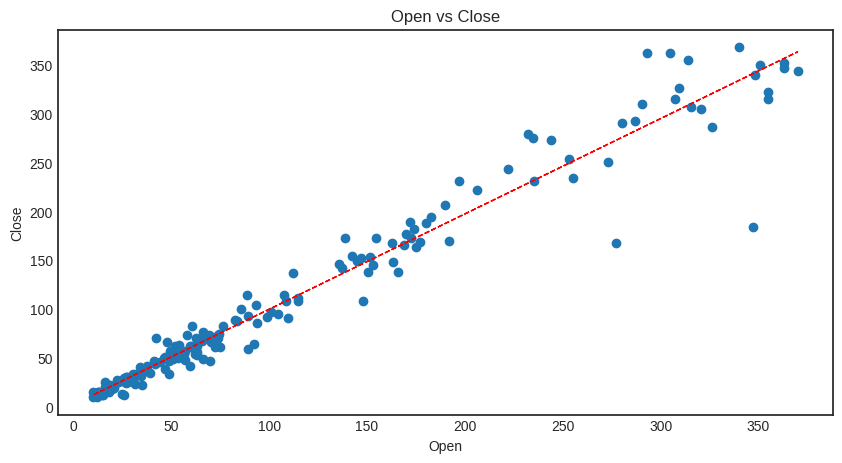

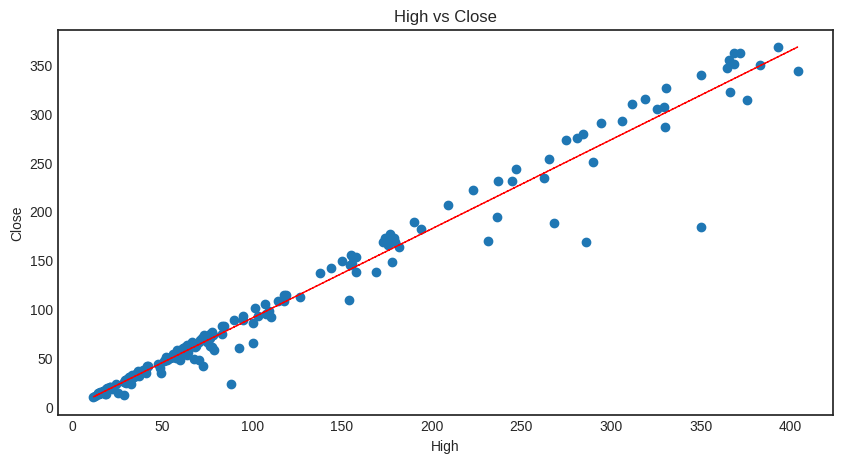

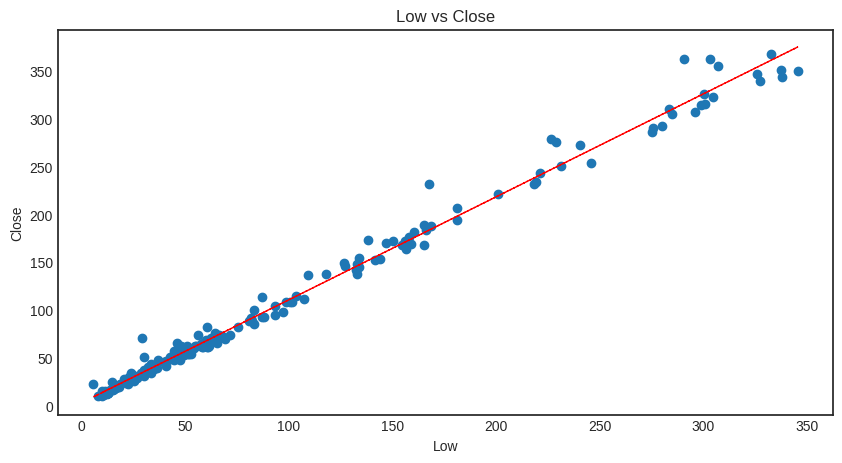

In [ ]:
# scatter plot to see the relationship between dependent & independent variables
for col in df.describe().columns[:-1]:
  fig = plt.figure(figsize=(10,5))
  ax = fig.gca()
  plt.scatter(df[col], df['Close'])
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('{} vs Close'.format(col))
  z = np.polyfit(df[col], df['Close'], 1)
  y_hat = np.poly1d(z)(df[col])
  plt.plot(df[col], y_hat, "r--", lw=1)
  plt.show()

### Every feature is extremely corelated with each other, so taking just one feature or average of these features would suffice for our regression model as linear regression assumes there is no multi colinearity in the features.

### <b> Feature Engineering

In [ ]:
# Creating a new feature based on average of other features in the dataset
df['OHL'] = df[['Open', 'High', 'Low']].mean(axis=1).round(2)
df.head()

,Date,Open,High,Low,Close,OHL
0,2005-07-01,13.00,14.00,11.25,12.46,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,13.37


### Linear regression also assumes a linear relationship between the target variables and independent variables, let's check if such relationship exists through a scatter plot

In [ ]:
# use lags as additional features
for i in range(1, 13):
    df["lag_{}".format(i)] = df.OHL.shift(i) #payment of a finacial obligation later than is expection or requried is called lag

In [ ]:
df.corr()

,Open,High,Low,Close,OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Open,1.000000,0.993040,0.983978,0.977971,0.996876,0.989674,0.964962,0.943676,0.921958,0.902362,0.886355,0.872317,0.850426,0.823301,0.794819,0.762572,0.723540
High,0.993040,1.000000,0.983422,0.985051,0.996880,0.987993,0.971070,0.951707,0.932376,0.917015,0.902390,0.887056,0.866507,0.840119,0.810758,0.781673,0.744224
Low,0.983978,0.983422,1.000000,0.995358,0.992996,0.970552,0.945783,0.922075,0.900626,0.881313,0.863192,0.841440,0.814842,0.785735,0.754822,0.715183,0.672286
Close,0.977971,0.985051,0.995358,1.000000,0.990136,0.965703,0.944046,0.922324,0.902717,0.886379,0.872247,0.850794,0.823717,0.795404,0.763104,0.723854,0.681722
OHL,0.996876,0.996880,0.992996,0.990136,1.000000,0.987468,0.965455,0.944038,0.923186,0.905133,0.888915,0.871978,0.849030,0.821450,0.791784,0.758255,0.718433
lag_1,0.989674,0.987993,0.970552,0.965703,0.987468,1.000000,0.987406,0.965284,0.943756,0.922845,0.904778,0.888479,0.871402,0.848688,0.820869,0.791222,0.758075
lag_2,0.964962,0.971070,0.945783,0.944046,0.965455,0.987406,1.000000,0.987344,0.965109,0.943512,0.922570,0.904414,0.887983,0.871152,0.848225,0.820429,0.791163
lag_3,0.943676,0.951707,0.922075,0.922324,0.944038,0.965284,0.987344,1.000000,0.987281,0.964963,0.943323,0.922282,0.903994,0.887788,0.870779,0.847889,0.820460
lag_4,0.921958,0.932376,0.900626,0.902717,0.923186,0.943756,0.965109,0.987281,1.000000,0.987240,0.964872,0.943131,0.921947,0.903868,0.887490,0.870540,0.848027
lag_5,0.902362,0.917015,0.881313,0.886379,0.905133,0.922845,0.943512,0.964963,0.987240,1.000000,0.987203,0.964742,0.942887,0.921807,0.903583,0.887240,0.870608


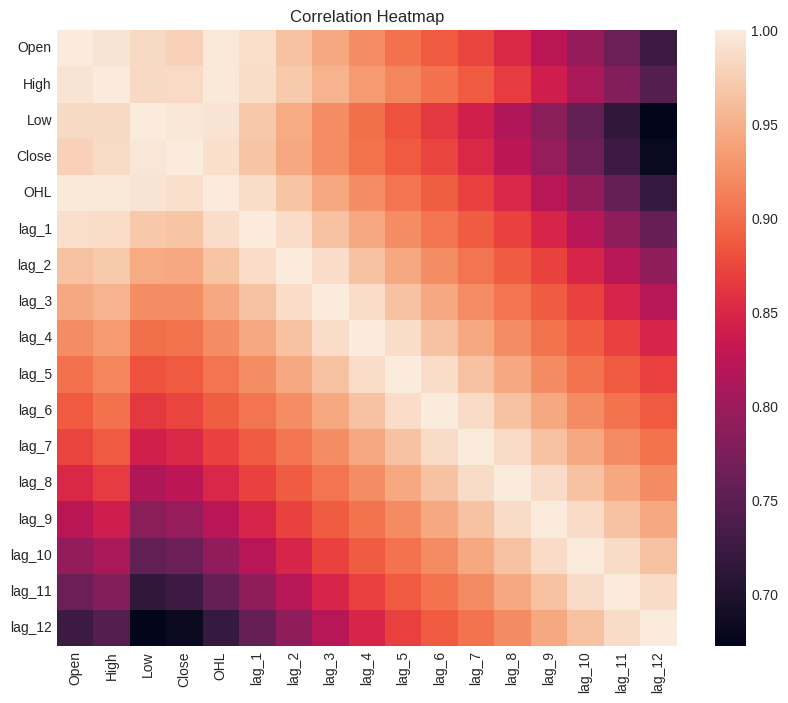

In [ ]:
# correlation between features
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

#### To reduce multicollinearity we can use regularization that means to keep all the features but reducing the magnitude of the coefficients of the model. This is a good solution when each predictor contributes to predict the dependent variable.

<Axes: ylabel='count'>

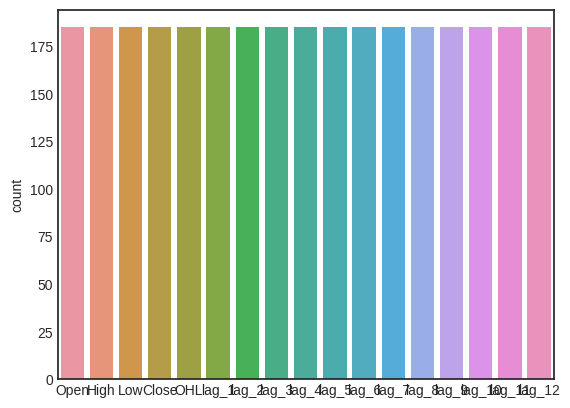

In [ ]:
# Chart - 1 visualization code
sns.countplot(df)

CHART 2

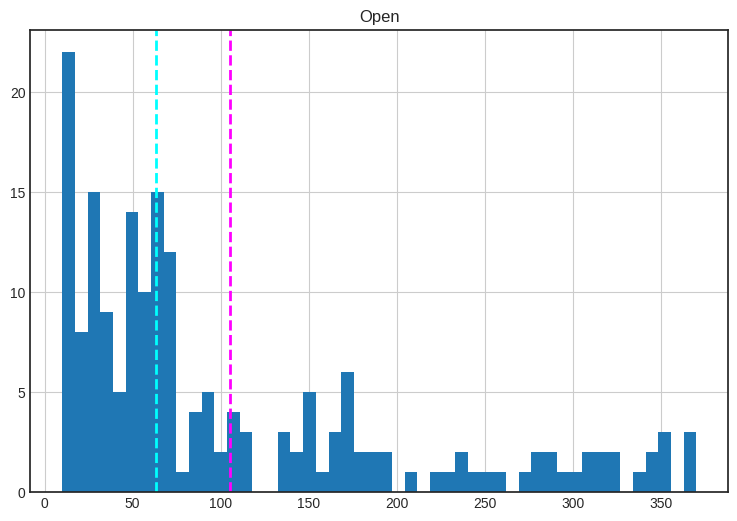

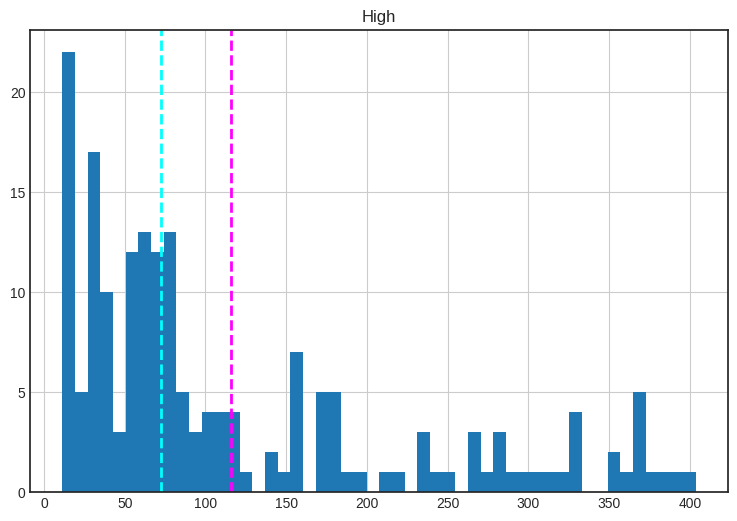

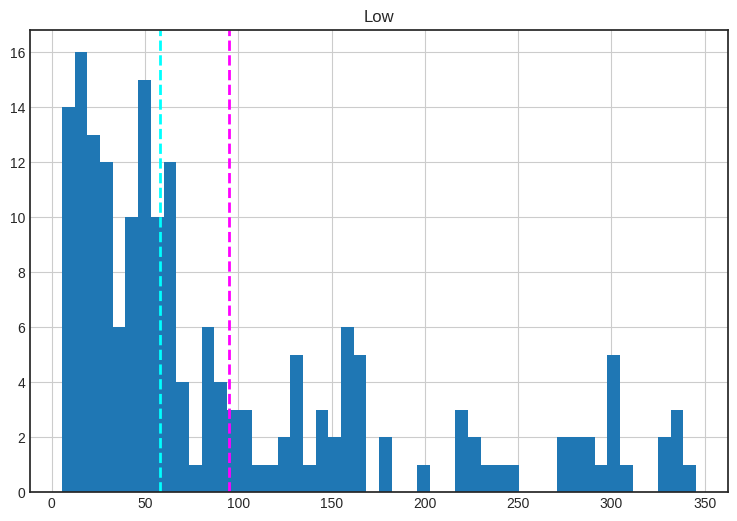

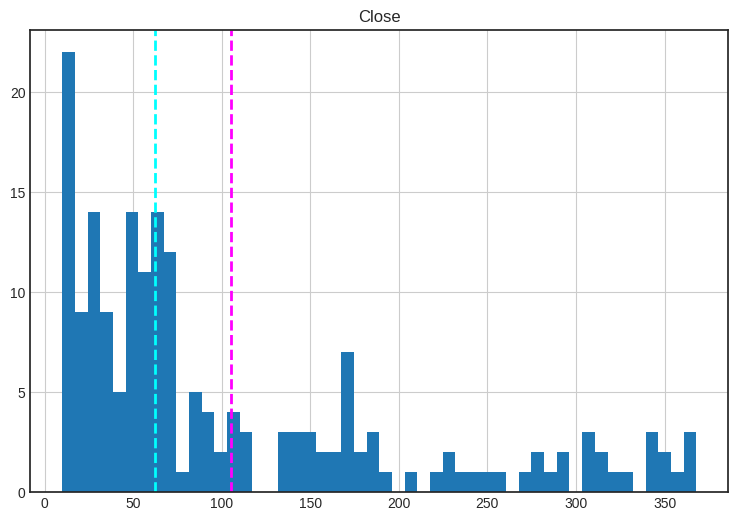

In [ ]:
numeric_features = df.describe().columns
for col in numeric_features[0:4]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)

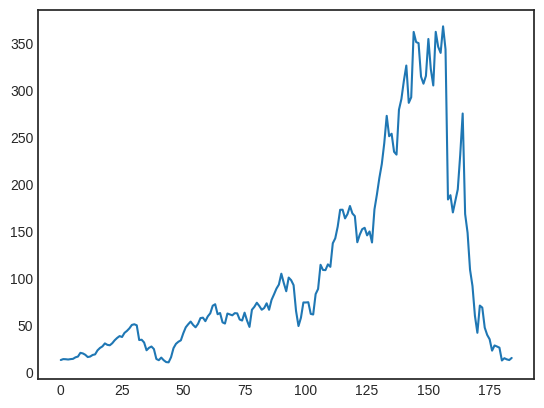

In [ ]:
# Chart - 3 
plt.plot(df['Close'])

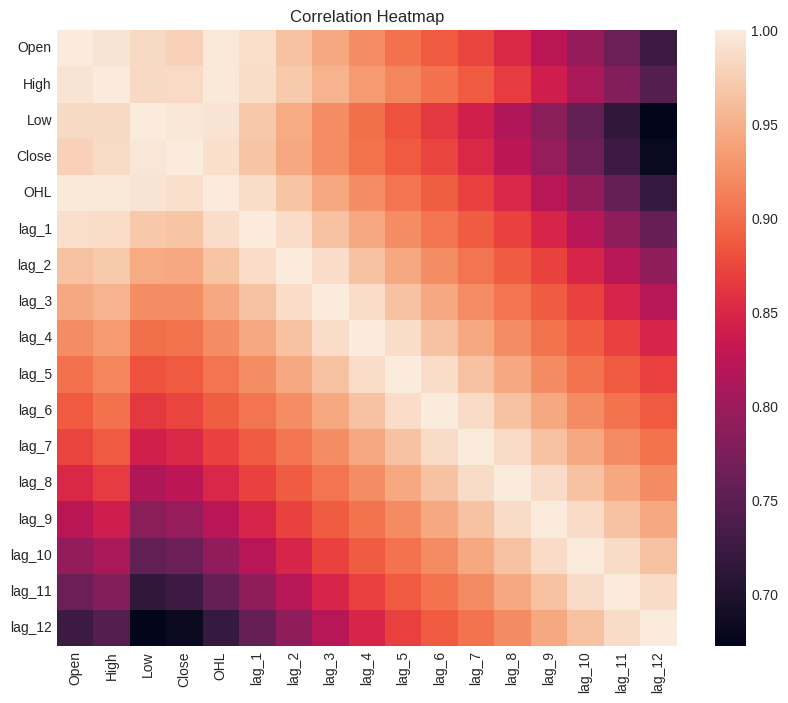

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr())
plt.title('Correlation Heatmap')
plt.show()

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
DataToTest=df['Open']
stat,p = shapiro(DataToTest)
print('stat=%2f,p=%3f' %(stat,p))
if p>0.5:
      print('Normal distribution')
else:
  print('Not a noormal distribution')

stat=0.817096,p=0.000000
Not a noormal distribution


In [ ]:
from numpy.random import randn
DataToTest=randn(100)

In [ ]:
stat,p = shapiro(DataToTest)
print('stat=%2f,p=%3f' %(stat,p))
if p>0.5:
      print('Normal distribution')
else:
  print('Not a noormal distribution')

stat=0.985401,p=0.339318
Not a noormal distribution


##### Which statistical test have you done to obtain P-Value?

Answer Here.shaippro test


#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Answer Here.shaippro test


### Hypothetical Statement - 2

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import normaltest
DataToTest=df['Open']
stat ,p = normaltest(DataToTest)
print('stat=%10f,p=%10f' %(stat,p))
if p>0.5:
      print('Normal')
else:
  print('Not a normaly distributed')


stat= 35.632476,p=  0.000000
Not a normaly distributed


##### Which statistical test have you done to obtain P-Value?

Answer Here. normal test


### Hypothetical Statement - 3

#### 2. Perform an appropriate statistical test.

In [ ]:
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = df['Open']
list2 = df['Close']
 # Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)



Pearsons correlation: 0.978


### <b> Train-Test Split

In [ ]:
# 5 fold time-series cross-validation 
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
# function for splitting time-series dataset
def timeseries_train_test_split(X, y, test_size):
    """
        Perform train-test split with respect to time series structure
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    scaler = StandardScaler()
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [ ]:
# choose appropriate dependent and independent variables
y = df.dropna().Close
X = df.dropna().drop(['Date','Close','Open','High','Low'], axis=1)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.2)

# <b> Model Building

### <b> Implementing linear regression model

In [ ]:
# initialize and fit linear regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

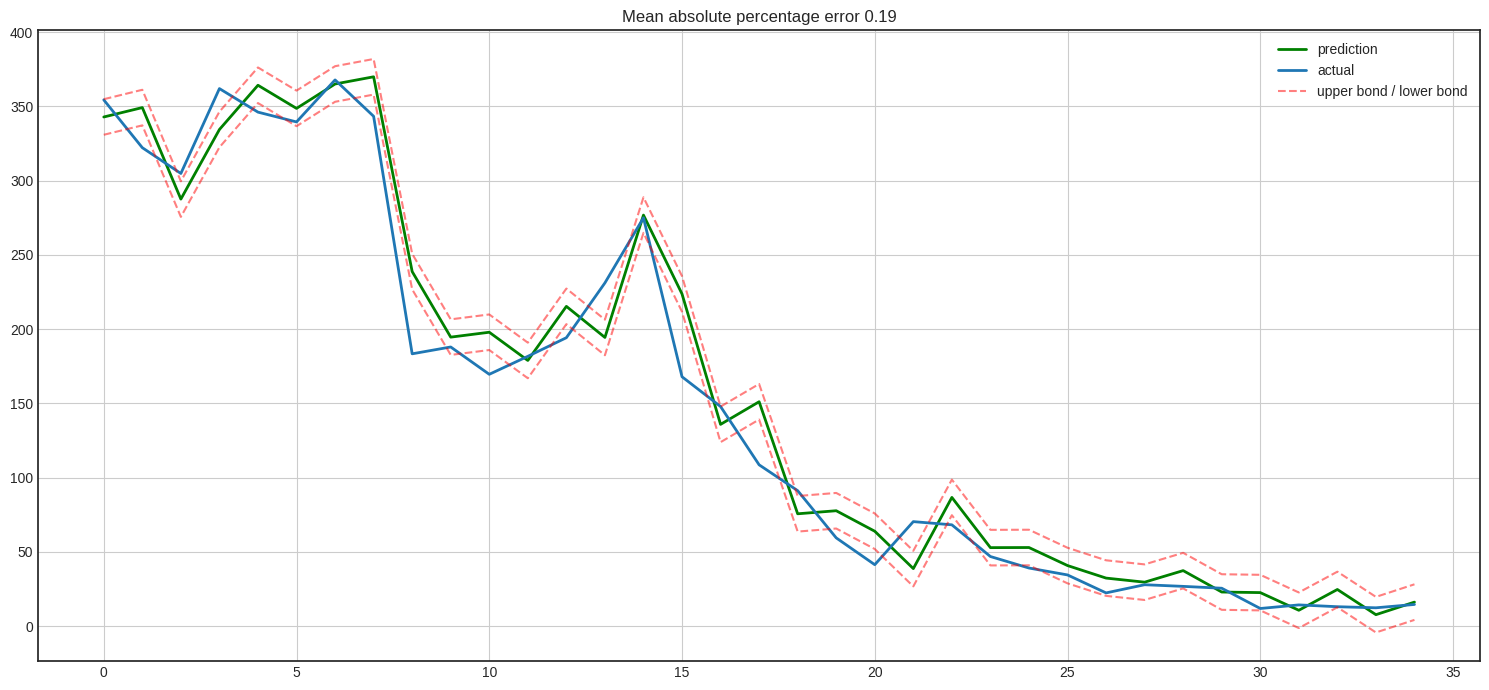

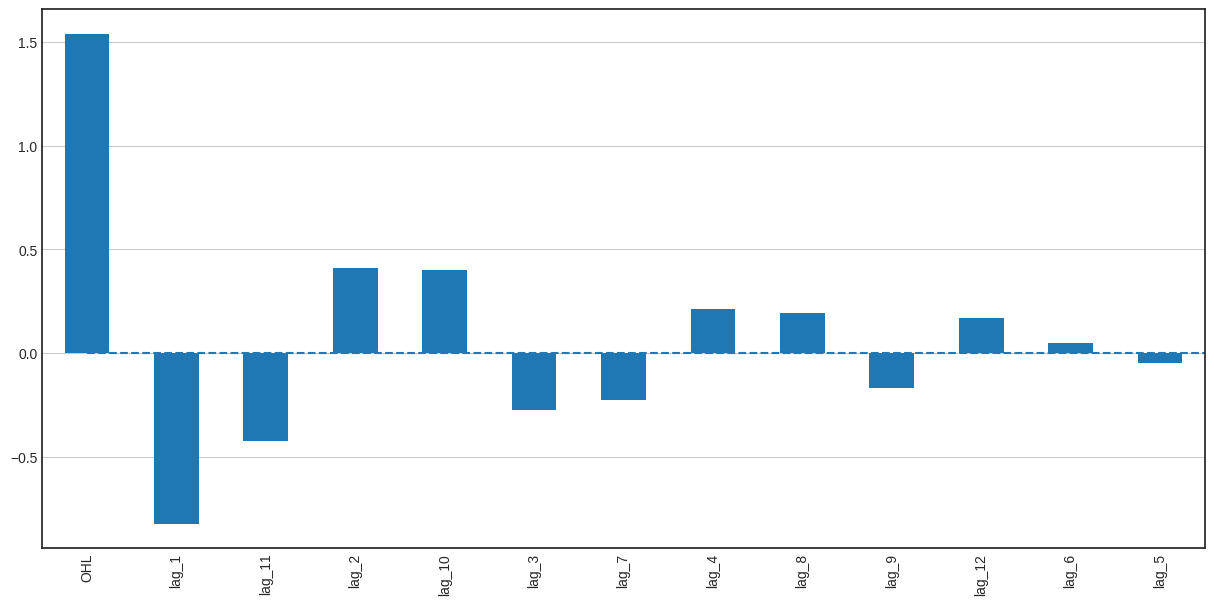

In [ ]:
# function to plot model performance
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 7))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0)
    
    if plot_intervals:
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, 
                                    scoring="neg_mean_absolute_error")
        mae = cv.mean() * (-1)
        deviation = cv.std()
        
        scale = 1.96
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="upper bond / lower bond", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Anomalies")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Mean absolute percentage error {0:.2f}".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

# function to plot coefficients   
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed')

plotModelResults(lr, plot_intervals=True)
plotCoefficients(lr)

mean absolute error: 16.93

mean squared error: 486.35

root mean squared error: 22.05

r2_score: 0.97

mean absolute percentage error: 0.19





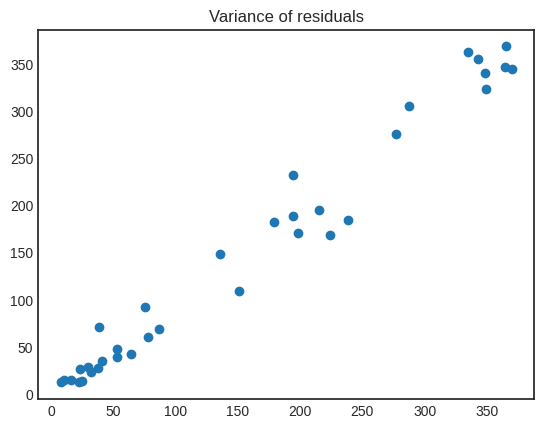

In [ ]:
# make predictions
lr_y_pred = lr.predict(X_test)

# evaluate predictions
lr_mae = round(mean_absolute_error(y_test, lr_y_pred),2)
print('mean absolute error: {}\n'.format(lr_mae))
lr_mse = round(mean_squared_error(y_test, lr_y_pred),2)
print('mean squared error: {}\n'.format(lr_mse))
lr_rmse = round(np.sqrt(lr_mse),2)
print('root mean squared error: {}\n'.format(lr_rmse))
lr_r2 = round(r2_score(y_test, lr_y_pred),2)
print('r2_score: {}\n'.format(lr_r2))
lr_mape = round(mean_absolute_percentage_error(lr_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(lr_mape))

# Check for homoscadacity
plt.scatter(lr_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

### <b> Implementing ridge regression

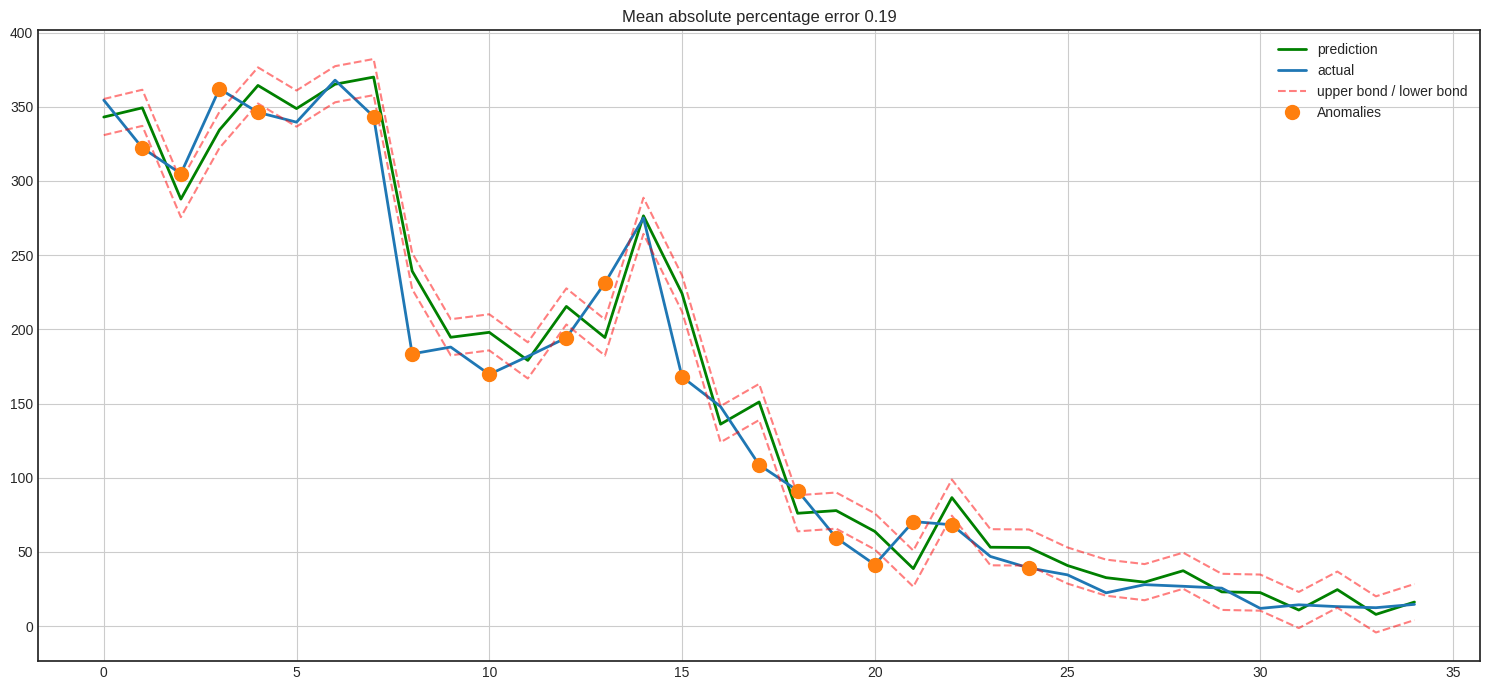

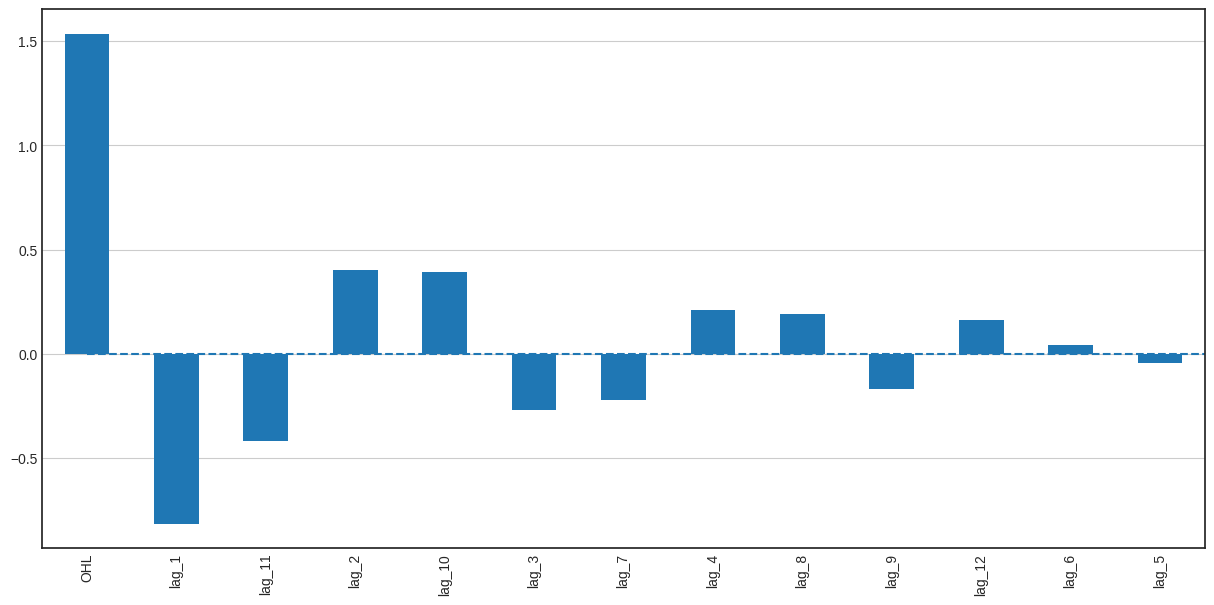

In [ ]:
# initialize and fit ridge regression
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train, y_train)

plotModelResults(ridge, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

mean absolute error: 16.91

mean squared error: 488.09

root mean squared error: 22.09

r2_score: 0.97

mean absolute percentage error: 0.19





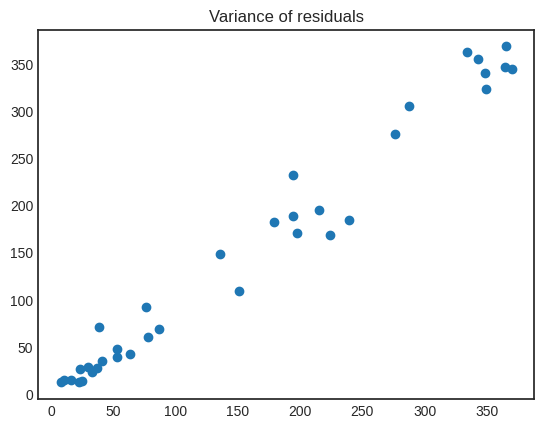

In [ ]:
# make predictions
r_y_pred = ridge.predict(X_test)

# evaluate predictions
r_mae = round(mean_absolute_error(r_y_pred, y_test),2)
print('mean absolute error: {}\n'.format(r_mae))
r_mse = round(mean_squared_error(r_y_pred, y_test),2)
print('mean squared error: {}\n'.format(r_mse))
r_rmse = round(np.sqrt(r_mse),2)
print('root mean squared error: {}\n'.format(r_rmse))
r_r2 = round(r2_score(r_y_pred, y_test),2)
print('r2_score: {}\n'.format(r_r2))
r_mape = round(mean_absolute_percentage_error(r_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(r_mape))

# Check for homoscadacity
plt.scatter(r_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()


### <b> Implementing lasso regression

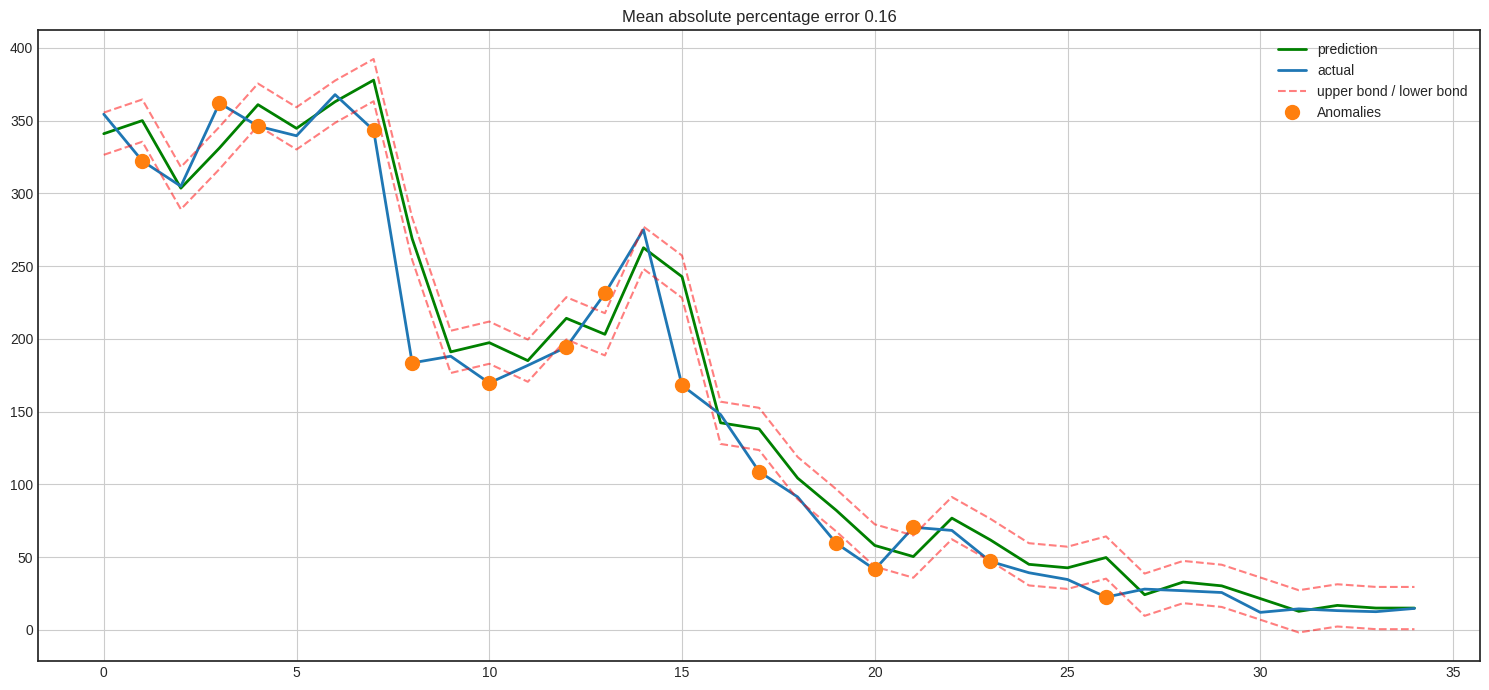

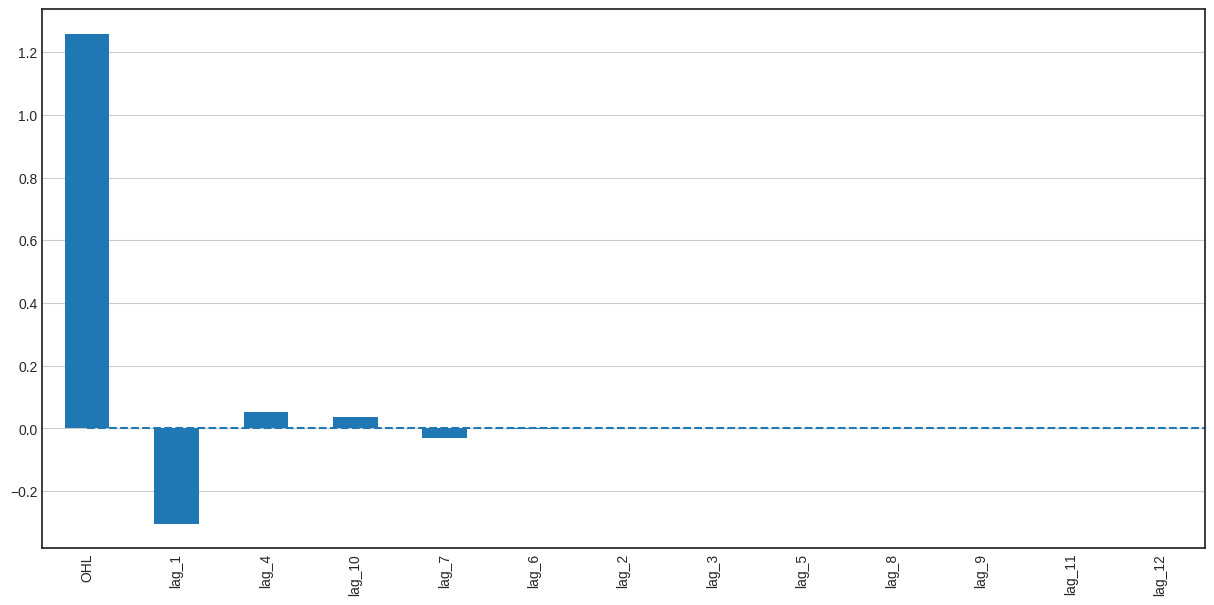

In [ ]:



# initialize and fit lasso regression
lasso = LassoCV(cv=tscv)
lasso.fit(X_train, y_train)

plotModelResults(lasso, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

mean absolute error: 16.87

mean squared error: 626.48

root mean squared error: 25.03

r2_score: 0.96

mean absolute percentage error: 0.16





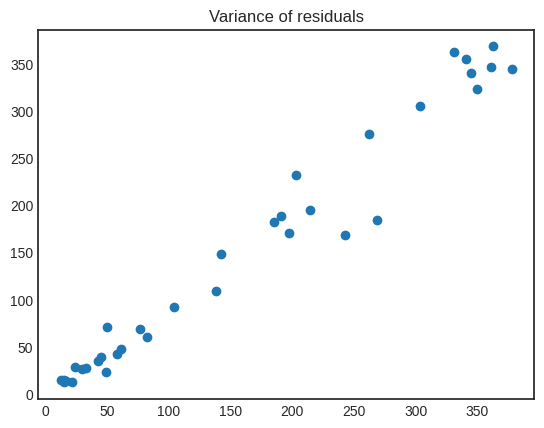

In [ ]:
# make predictions
l_y_pred = lasso.predict(X_test)

# evaluate predictions
l_mae = round(mean_absolute_error(y_test, l_y_pred),2)
print('mean absolute error: {}\n'.format(l_mae))
l_mse = round(mean_squared_error(y_test, l_y_pred),2)
print('mean squared error: {}\n'.format(l_mse))
l_rmse = round(np.sqrt(l_mse),2)
print('root mean squared error: {}\n'.format(l_rmse))
l_r2 = round(r2_score(y_test, l_y_pred),2)
print('r2_score: {}\n'.format(l_r2))
l_mape = round(mean_absolute_percentage_error(l_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(l_mape))

# Check for homoscadacity
plt.scatter(l_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

### <b> Implementing elasticnet regression

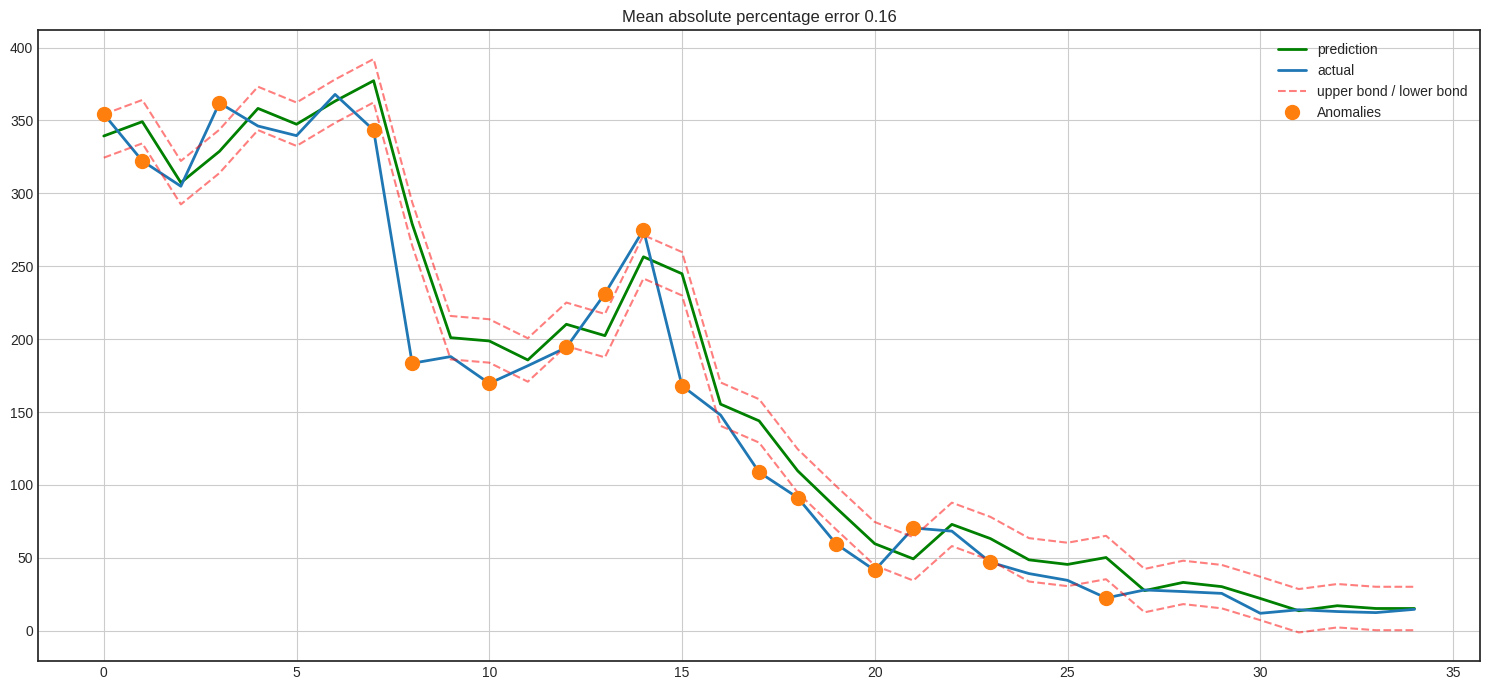

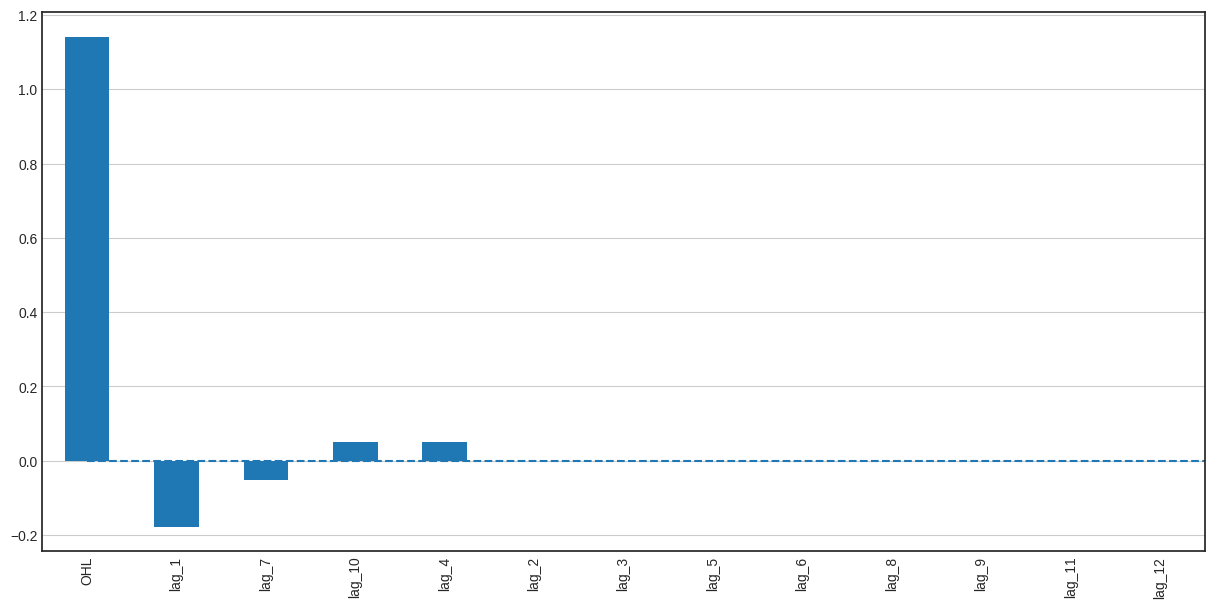

In [ ]:
# initialize and fit elasticnet regression
elasticnet = ElasticNetCV(cv=tscv)
elasticnet.fit(X_train, y_train)

plotModelResults(elasticnet, 
                 X_train, 
                 X_test, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(elasticnet)

mean absolute error: 18.34

mean squared error: 726.63

root mean squared error: 26.96

r2_score: 0.95

mean absolute percentage error: 0.16





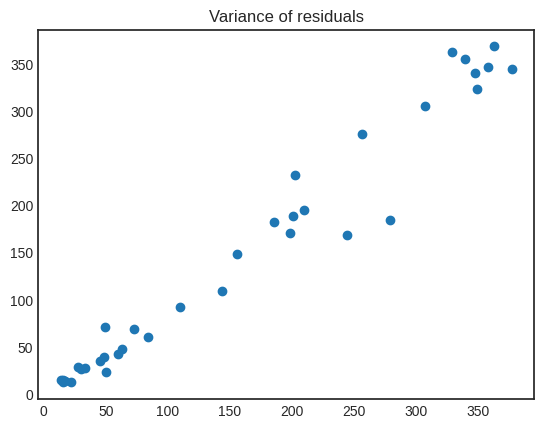

In [ ]:
# make predictions
e_y_pred = elasticnet.predict(X_test)

# evaluate predictions
e_mae = round(mean_absolute_error(y_test, e_y_pred),2)
print('mean absolute error: {}\n'.format(e_mae))
e_mse = round(mean_squared_error(y_test, e_y_pred),2)
print('mean squared error: {}\n'.format(e_mse))
e_rmse = round(np.sqrt(e_mse),2)
print('root mean squared error: {}\n'.format(e_rmse))
e_r2 = round(r2_score(y_test, e_y_pred),2)
print('r2_score: {}\n'.format(e_r2))
e_mape = round(mean_absolute_percentage_error(e_y_pred, y_test),2)
print('mean absolute percentage error: {}\n\n\n'.format(e_mape))

# Check for homoscadacity
plt.scatter(e_y_pred, y_test)
plt.title('Variance of residuals')
plt.show()

### <b> Evaluation Summary

In [ ]:
# create dataframe with evaluation metrics
model_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'], 'mae':[lr_mae,r_mae,l_mae,e_mae], 'mse':[lr_mse,r_mse,l_mse,e_mse],'rmse':[lr_rmse,r_rmse,l_rmse,e_rmse],'r2_score':[lr_r2,r_r2,l_r2,e_r2],'mape':[lr_mape,r_mape,l_mape,e_mape]})
model_report 

,model,mae,mse,rmse,r2_score,mape
0,linear regression,16.93,486.35,22.05,0.97,0.19
1,ridge regression,16.91,488.09,22.09,0.97,0.19
2,lasso regression,16.87,626.48,25.03,0.96,0.16
3,elastic net regression,18.34,726.63,26.96,0.95,0.16


*CONCLUSION*


---

*   **Using data visualization on our target variable, we can clearly see the impact of 2018 fraud case involving Rana Kapoor as the stock prices decline dramatically during that period.**
*   **After loading the dataset, we found that there are no null values in our dataset nor any duplicate data.**
*   **There are some outliers in our features however this being a very small dataset, dropping those instances will lead to loss of information.**
*   **We found that the distribution of all our variables is positively skewed. so we performed log transformation on them.**
*   **There is a high correlation between the dependent and independent variables. This is a signal that our dependent variable is highly dependent on our features and can be predicted accurately from them.**
*   **We found that there is a rather high correlation between our independent variables. This multicollinearity is however unavoidable here as the dataset is very small.**
*   **We implemented several models on our dataset in order to be able to predict the closing price and found that all our models are performing remarkably well and *Elastic Net regressor is the best performing model with A R2 score value of 0.9938* and scores well on all evaluation metrics.** 

